In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Creating the dataset

Let us start by creating a dataset representing a noisy cubic polynomial with equation $-0.2 x^3 + \mu$, where $\mu \sim \mathcal{N}(0, 4)$ is the *noise factor*

In [3]:
np.random.seed(42)
X = (np.random.rand(100, 1) - 0.5) * 10 # extract 100 numbers on one dimension
y = -0.2 * X**3 + np.random.normal(loc=0, scale=2, size=[100,1])

We can also visualize the dataset by plotting it, yielding

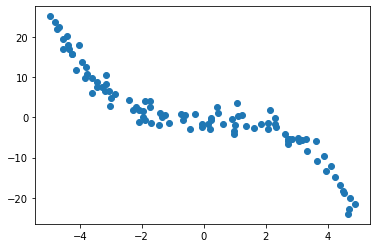

In [4]:
plt.scatter(X,y)

We need the data to be in homogeneous coordinates, so we first define a column vector of ones
$$
\textbf{ones} = \begin{pmatrix}
1 \\
1 \\
\vdots \\
1
\end{pmatrix}
$$
and then we define the homogeneus coordinates matrix
$$
XX = X \; | \; \textbf{ones}
$$

In [9]:
# Define a column array made of only ones
ones = np.ones((len(X),1),  dtype=int)
XX = np.column_stack((X, ones))

# Define the least square "solver"

Recall from the theory that the least square solver is given by the following equation
$$
\hat{w} = (X^T X)^{-1} X^T y
$$

In [44]:
def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# (My bad previous normalized version :S)
# def least_squares(X, y, lam):
#     X_t = np.transpose(X)
#     Lam = np.eye(len(X_t), len(X_t)) * lam
#     X_t_X = np.matmul(X_t, X)
#     X_inv = inv(X_t_X + Lam)
#     X_t_y = np.matmul(X_t, y)
#     return np.matmul(X_inv, X_t_y)

Apply it to our data

In [16]:
ww = least_squares(XX, y)
print(ww)

[[-3.10224715]
 [ 0.06642012]]


It's time to plot results, let start by generating new points in the interval $[-5,5]$ and compute the $y$ using the solution found by least squares.

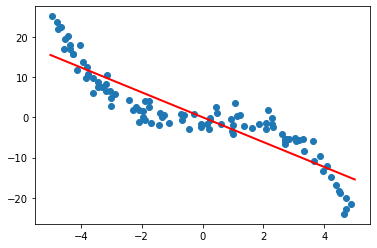

In [36]:
xs = np.linspace(-5, 5)
# Transform the data into Homogeneus coordinates
xxs = np.column_stack((xs, np.ones((50, 1))))
# Predict the values
ys = xxs @ ww

# We can now plot the value using matplotlib
plt.scatter(X,y) # in scatterplots, points are connected by segments
plt.plot(xs, ys, c='r', lw=2)

# Solving a non-linear problem using the "slow" kernel trick

We will use the sklearn **PolynomialFeatures** class to preprocess our data by mapping them into a "polynomial space". Since our model is 2-Dimensional (a line) we will need a space able to represent all polynomials of degree 3. Plus, in this case we even know that the data comes from a polynomial of degree 3.

In [40]:
# the parameter include_bias simply puts automatically the column of ones, therefore automatically transforming the data in homogeneus coordinates
polyfeatures = PolynomialFeatures(degree=3, include_bias=True)
polyfeatures.fit(X)
polyX = polyfeatures.transform(X) 
# We could have done those last steps with a single .fit_transform(X) function call

Now we can use our `least_squares` solver to find a solution in the transformed space...

In [41]:
polyww = least_squares(polyX, y)

Generate new data to plot the solution (again, using `linspace` to generate points in the interval $[-5,5]$).

In [42]:
xs = np.linspace(-5, 5, 100).reshape(-1,1)
polyxs = polyfeatures.transform(xs)
polyys = polyxs @ polyww

We can now plot the data and our solution

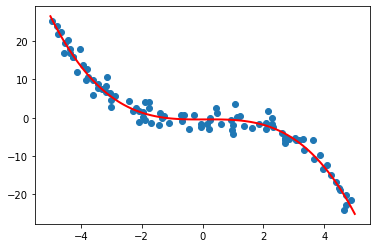

In [45]:
plt.scatter(X,y)
plt.plot(xs, polyys, c='r',lw=2)

# This kernel trick is slow!
We will show now that the trick that we have done previously it is in fact pretty slow, especially in cases where the dimensions are high. We can prove that the higher the dimension the slower the compute time is going to be.

1 	 Num Features         14 Time 0.0002s
2 	 Num Features        105 Time 0.0003s
3 	 Num Features        560 Time 0.0012s
4 	 Num Features       2380 Time 0.0010s
5 	 Num Features       8568 Time 0.0023s
6 	 Num Features      27132 Time 0.0116s
7 	 Num Features      77520 Time 0.0369s
8 	 Num Features     203490 Time 0.0712s
9 	 Num Features     497420 Time 0.1462s
10 	 Num Features    1144066 Time 0.3219s
11 	 Num Features    2496144 Time 0.6947s
12 	 Num Features    5200300 Time 1.4417s
13 	 Num Features   10400600 Time 3.2270s


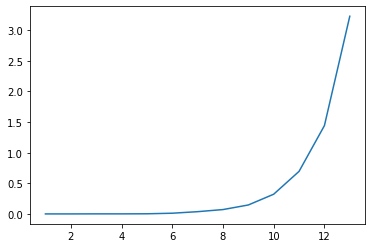

In [53]:
import time

X = np.random.rand(100, 13) # generate 100 points in a 13-dimension (13 features)
results_degrees = []
results_times = []

for i in range(13):
    poly = PolynomialFeatures(degree = i+1)
    
    start = time.time()
    polyX = poly.fit_transform(X)
    end = time.time()
    
    results_degrees.append(i+1)
    results_times.append(end - start)
    
    print("{} \t Num Features {:10d} Time {:2.4f}s".format(i+1, polyX.shape[1], end-start))
    
plt.plot(results_degrees, results_times)